In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics
import h5py
import anndata
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import os
import scanpy as sc
from sklearn import preprocessing

path = "/home/data/designproject2122/data/scRNAseq_Benchmark_datasets/Intra-dataset/Zheng sorted/"
os.chdir(path)

/home/seoyeono/.conda/envs/dp2122/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
labels = pd.read_csv("Labels.csv")
labels

,x
0,CD14+ Monocyte
1,CD14+ Monocyte
2,CD14+ Monocyte
3,CD14+ Monocyte
4,CD14+ Monocyte
...,...
19995,CD8+/CD45RA+ Naive Cytotoxic
19996,CD8+/CD45RA+ Naive Cytotoxic
19997,CD8+/CD45RA+ Naive Cytotoxic
19998,CD8+/CD45RA+ Naive Cytotoxic


In [4]:
PBMC = pd.read_csv("Filtered_DownSampled_SortedPBMC_data.csv")
PBMC # 20000 rows (cells) x 21953 columns (genes)labels

,Unnamed: 0,RP11.34P13.7,RP11.34P13.8,AL627309.1,AP006222.2,RP5.857K21.4,RP11.206L10.3,RP11.206L10.2,RP11.206L10.9,FAM87B,...,MT.CYB,AC145212.1,AC011043.1,ZNF84.1,AL592183.1,AC011841.1,AL354822.1,KIR2DL2,PNRC2.1,SRSF10.1
0,CACTTTGACGCAAT,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,GTTACGGAAACGAA,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,AGTCACGACAGGAG,0,0,0,0,0,0,0,0,0,...,16,0,0,0,0,0,0,0,1,0
3,TTCGAGGACCAGTA,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4,CACTTATGAGTCGT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,GGAGCGCTCCACAA,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19996,GGCCAGACGTGTAC.1,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
19997,CAGATGACCTTGCC,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
19998,CTCTAAACCGACAT,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0


In [5]:
#make a copy of count data to filter low count cells and low gene expression
filtered = PBMC.copy()
filtered["Unnamed: 0"] = labels  #cell type labels
filtered = filtered[filtered.sum(axis=1) > 200] #cells expressed in more than 200 genes

/tmp/ipykernel_31473/4079415173.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filtered = filtered[filtered.sum(axis=1) > 200] #cells expressed in more than 200 genes


In [6]:
filtered

,Unnamed: 0,RP11.34P13.7,RP11.34P13.8,AL627309.1,AP006222.2,RP5.857K21.4,RP11.206L10.3,RP11.206L10.2,RP11.206L10.9,FAM87B,...,MT.CYB,AC145212.1,AC011043.1,ZNF84.1,AL592183.1,AC011841.1,AL354822.1,KIR2DL2,PNRC2.1,SRSF10.1
0,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,16,0,0,0,0,0,0,0,1,0
3,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CD8+/CD45RA+ Naive Cytotoxic,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19996,CD8+/CD45RA+ Naive Cytotoxic,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
19997,CD8+/CD45RA+ Naive Cytotoxic,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
19998,CD8+/CD45RA+ Naive Cytotoxic,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0


In [7]:
filtered = filtered[filtered.iloc[:,1:].sum(axis=1) > 3] #genes expressed in at least 4 cells
filtered


,Unnamed: 0,RP11.34P13.7,RP11.34P13.8,AL627309.1,AP006222.2,RP5.857K21.4,RP11.206L10.3,RP11.206L10.2,RP11.206L10.9,FAM87B,...,MT.CYB,AC145212.1,AC011043.1,ZNF84.1,AL592183.1,AC011841.1,AL354822.1,KIR2DL2,PNRC2.1,SRSF10.1
0,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,16,0,0,0,0,0,0,0,1,0
3,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4,CD14+ Monocyte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CD8+/CD45RA+ Naive Cytotoxic,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19996,CD8+/CD45RA+ Naive Cytotoxic,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
19997,CD8+/CD45RA+ Naive Cytotoxic,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
19998,CD8+/CD45RA+ Naive Cytotoxic,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0


In [8]:
#create column with 'l1_label', compatible with Azimuth PBMC celltype l1
filtered.loc[filtered['Unnamed: 0']=='CD14+ Monocyte','l1_label']='Monocyte'
filtered.loc[filtered['Unnamed: 0'].str.contains('CD4+'),'l1_label']='CD4+ T'
filtered.loc[filtered['Unnamed: 0'].str.contains('CD8+'),'l1_label']='CD8+ T'
filtered.loc[filtered['Unnamed: 0'].str.contains('B'),'l1_label']='B'
filtered.loc[filtered['Unnamed: 0'].str.contains('NK'),'l1_label']='NK'

#create column with 'l2_label', compatible with Azimuth PBMC celltype l2
filtered.loc[filtered['Unnamed: 0'].str.contains('Monocyte'),'l2_label']='Monocyte' #2000 cells
filtered.loc[filtered['Unnamed: 0'].str.contains('B'), 'l2_label']='B' #2000 cells
filtered.loc[filtered['Unnamed: 0'].str.contains('NK'), 'l2_label']='NK' #1996 cells
filtered.loc[filtered['Unnamed: 0'].str.contains('CD8+'), 'l2_label']='CD8+ T' #2000 cells
filtered.loc[filtered['Unnamed: 0'].str.contains('CD4+'), 'l2_label']='CD4+ T' #1999 cells
filtered.loc[filtered['Unnamed: 0'].str.contains('Naive T'), 'l2_label']='CD4+ Naive T' #1999 cells
filtered.loc[filtered['Unnamed: 0'].str.contains('Naive Cytotoxic'), 'l2_label']='CD8+ Naive T' #2000 cells
filtered.loc[filtered['Unnamed: 0'].str.contains('Memory'), 'l2_label']='CD4+ Memory T' #2000 cells
filtered.loc[filtered['Unnamed: 0'].str.contains('Reg'), 'l2_label']='CD4+ Treg' #1998 cells

filtered['l2_label']

0            Monocyte
1            Monocyte
2            Monocyte
3            Monocyte
4            Monocyte
             ...     
19995    CD8+ Naive T
19996    CD8+ Naive T
19997    CD8+ Naive T
19998    CD8+ Naive T
19999    CD8+ Naive T
Name: l2_label, Length: 20000, dtype: object

In [9]:
filtered_na = filtered[~filtered['l2_label'].isna()] #CD34+ cells are classified as NaN
filtered_na.shape

(18000, 21955)

In [10]:
le = preprocessing.LabelEncoder()
y4 = le.fit(filtered['l2_label'])
y4.classes_

array(['B', 'CD4+ Memory T', 'CD4+ Naive T', 'CD4+ T', 'CD4+ Treg',
       'CD8+ Naive T', 'CD8+ T', 'Monocyte', 'NK', nan], dtype=object)

In [11]:
path = "/home/data/designproject2122/data/Azimuth PBMC/"
os.chdir(path)

In [12]:
hvg_5000 = sc.read_h5ad('azimuth_5000_rawcounts.h5ad')
hvg_5000

AnnData object with n_obs × n_vars = 161764 × 5000
    obs: 'celltype.l1', 'celltype.l2', 'celltype.l3', 'donor'
    var: 'gene_names', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [13]:
hvg_5000.obs

,celltype.l1,celltype.l2,celltype.l3,donor
0,Mono,CD14 Mono,CD14 Mono,P2
1,CD4 T,CD4 TCM,CD4 TCM_1,P1
2,CD8 T,CD8 Naive,CD8 Naive,P4
3,NK,NK,NK_2,P3
4,CD8 T,CD8 Naive,CD8 Naive,P4
...,...,...,...,...
161759,CD8 T,CD8 Naive,CD8 Naive,P5
161760,Mono,CD14 Mono,CD14 Mono,P5
161761,B,B intermediate,B intermediate kappa,P8
161762,Mono,CD16 Mono,CD16 Mono,P5


In [14]:
hvg_5000.obs['donor'].unique()

['P2', 'P1', 'P4', 'P3', 'P5', 'P7', 'P6', 'P8']
Categories (8, object): ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']

In [14]:
hvg_5000.var

,gene_names,highly_variable,highly_variable_rank,means,variances,variances_norm
8,HES4,True,347.0,0.138022,0.440146,2.724429
9,ISG15,True,388.0,0.860791,3.679470,2.511467
12,TTLL10,True,3536.0,0.001465,0.001784,1.055443
13,TNFRSF18,True,642.0,0.085316,0.185330,1.876969
14,TNFRSF4,True,912.0,0.078429,0.147153,1.619425
...,...,...,...,...,...,...
20696,PDZRN3,True,1875.0,0.000043,0.000056,1.220828
20700,CDH6,True,367.0,0.000087,0.000247,2.583741
20704,DGKI,True,862.0,0.000049,0.000087,1.651858
20710,VWA2,True,1373.0,0.000031,0.000043,1.351958


In [15]:
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('NK'), 'new_label'] = 'NK'
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('Mono'), 'new_label'] = 'Monocyte'
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('CD4'), 'new_label'] = 'CD4+ T'
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('CD4 TCM'), 'new_label'] = 'CD4+ Memory T'
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('Treg'), 'new_label'] = 'CD4+ Treg'
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('CD8 '), 'new_label']='CD8+ T'
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('CD8 Naive'), 'new_label']='CD8+ Naive T'
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('CD4 Naive'), 'new_label']='CD4+ Naive T'
hvg_5000.obs.loc[hvg_5000.obs['celltype.l2'].str.contains('B'), 'new_label']='B'

In [16]:
hvg_5000.obs['new_label'].value_counts()

Monocyte         49010
NK               18664
CD4+ Naive T     17479
CD4+ Memory T    14889
CD8+ T           14701
B                13434
CD8+ Naive T     10768
CD4+ T            6126
CD4+ Treg         2507
Name: new_label, dtype: int64

<AxesSubplot:>

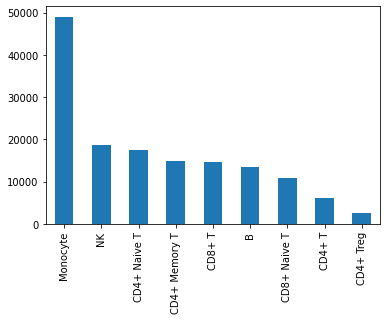

In [17]:
hvg_5000.obs['new_label'].value_counts().plot.bar()

In [18]:
Azimuth_genes = list(hvg_5000.var['gene_names'])

In [19]:
Zheng_genes = filtered.columns[1:-2]

In [20]:
common_features = list(set(Azimuth_genes) & set(Zheng_genes))

hvg_5000.var.sort_values('gene_names').index
#len(list(set(Azimuth_genes) & set(Zheng_genes))) gives 3873 genes
#a = hvg_5000[hvg_5000.var['gene_names'].isin(common_features)]

Index(['9767', '9766', '19670', '16582', '7862', '16499', '13522', '13520',
       '6073', '6072',
       ...
       '14907', '5991', '19098', '710', '17494', '19533', '13837', '4340',
       '9255', '6396'],
      dtype='object', length=5000)

In [21]:
ind = hvg_5000.var.index
names = list(hvg_5000.var.gene_names)[:]
var = hvg_5000.var

for n, i in enumerate(names):
    if i not in common_features:
        #print(n, i, ind[n])
        var = var.drop(ind[n])
hvg_3852 = hvg_5000[:,var.sort_values('gene_names').index]

In [22]:
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('NK'), 'new_label'] = 'NK'
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('Mono'), 'new_label'] = 'Monocyte'
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('CD4'), 'new_label'] = 'CD4+ T'
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('CD4 TCM'), 'new_label'] = 'CD4+ Memory T'
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('Treg'), 'new_label'] = 'CD4+ Treg'
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('CD8 '), 'new_label']='CD8+ T'
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('CD8 Naive'), 'new_label']='CD8+ Naive T'
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('CD4 Naive'), 'new_label']='CD4+ Naive T'
hvg_3852.obs.loc[hvg_3852.obs['celltype.l2'].str.contains('B'), 'new_label']='B'

In [23]:
hvg_3852.X

<161764x3852 sparse matrix of type '<class 'numpy.float32'>'
	with 75185220 stored elements in Compressed Sparse Row format>

In [24]:
hvg_3852.obs

,celltype.l1,celltype.l2,celltype.l3,donor,new_label
0,Mono,CD14 Mono,CD14 Mono,P2,Monocyte
1,CD4 T,CD4 TCM,CD4 TCM_1,P1,CD4+ Memory T
2,CD8 T,CD8 Naive,CD8 Naive,P4,CD8+ Naive T
3,NK,NK,NK_2,P3,NK
4,CD8 T,CD8 Naive,CD8 Naive,P4,CD8+ Naive T
...,...,...,...,...,...
161759,CD8 T,CD8 Naive,CD8 Naive,P5,CD8+ Naive T
161760,Mono,CD14 Mono,CD14 Mono,P5,Monocyte
161761,B,B intermediate,B intermediate kappa,P8,B
161762,Mono,CD16 Mono,CD16 Mono,P5,Monocyte


In [25]:
hvg_3852.obs['new_label'].value_counts()

Monocyte         49010
NK               18664
CD4+ Naive T     17479
CD4+ Memory T    14889
CD8+ T           14701
B                13434
CD8+ Naive T     10768
CD4+ T            6126
CD4+ Treg         2507
Name: new_label, dtype: int64

<AxesSubplot:>

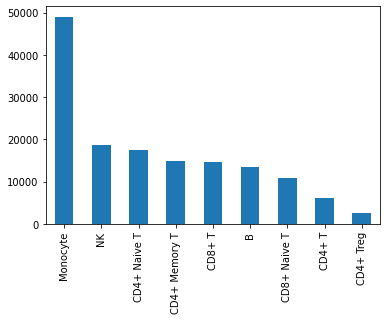

In [26]:
hvg_3852.obs['new_label'].value_counts().plot.bar()

In [27]:
hvg3852_filtered_na = hvg_3852[~hvg_3852.obs['new_label'].isna()]

In [28]:
Azimuth_X = hvg3852_filtered_na.X.toarray()

In [29]:
Azimuth_X.shape #(147578 cells, 3852 genes)

(147578, 3852)

In [30]:
Azimuth_y = hvg_3852.obs[~hvg_3852.obs['new_label'].isna()]['new_label']

In [31]:
print(hvg_3852.obs['new_label'].isna().sum()) #14186 NaN 
hvg_3852.obs[hvg_3852.obs['new_label'].isna()]['celltype.l2'].value_counts()

14186


gdT                  3649
MAIT                 2784
cDC2                 2501
Platelet             2293
pDC                   861
Doublet               605
Plasmablast           366
dnT                   356
HSPC                  329
cDC1                  151
ILC                   132
Eryth                  83
ASDC                   76
CD14 Mono               0
CD16 Mono               0
B memory                0
CD4 TEM                 0
B naive                 0
CD8 Naive               0
Treg                    0
CD4 CTL                 0
CD8 Proliferating       0
NK_CD56bright           0
NK Proliferating        0
NK                      0
CD4 Naive               0
CD4 TCM                 0
CD8 TCM                 0
CD8 TEM                 0
B intermediate          0
CD4 Proliferating       0
Name: celltype.l2, dtype: int64

In [33]:
Zheng_X = filtered_na[common_features]
Zheng_X = Zheng_X.reindex(sorted(Zheng_X.columns), axis=1)

#preprocessing.normalize(Zheng_X, norm='l1')
#np.log1p(Zheng_X)

#check if Zheng and Azimuth features(genes) are in the same order
set(Zheng_X.columns == hvg_3852.var['gene_names'])

{True}

In [50]:
Zheng_X

,A2M,A4GALT,AARD,ABCA1,ABCA13,ABCA5,ABCA6,ABCB1,ABCB4,ABCC3,...,ZNF91,ZNF92,ZNF99,ZNHIT6,ZPBP2,ZSCAN10,ZSCAN30,ZSWIM6,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
Zheng_y = filtered_na["l2_label"]

In [36]:
Zheng_X.shape, Zheng_y.shape

((18000, 3852), (18000,))

In [37]:
#train set: Azimuth PBMC data
X_train, y_train = Azimuth_X, Azimuth_y

# test set: Zhengsorted PBMC data
X_test, y_test = Zheng_X, Zheng_y

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((147578, 3852), (147578,), (18000, 3852), (18000,))

In [39]:
le = preprocessing.LabelEncoder()
le.fit(Zheng_y)
y_train = le.transform(Azimuth_y)
y_test = le.transform(Zheng_y)
le.classes_

array(['B', 'CD4+ Memory T', 'CD4+ Naive T', 'CD4+ T', 'CD4+ Treg',
       'CD8+ Naive T', 'CD8+ T', 'Monocyte', 'NK'], dtype=object)

In [40]:
y_train.shape, y_test.shape

((147578,), (18000,))

In [41]:
hvg3852_filtered_na.X

<147578x3852 sparse matrix of type '<class 'numpy.float32'>'
	with 68877348 stored elements in Compressed Sparse Row format>

In [42]:
hvg3852_filtered_na.obs

,celltype.l1,celltype.l2,celltype.l3,donor,new_label
0,Mono,CD14 Mono,CD14 Mono,P2,Monocyte
1,CD4 T,CD4 TCM,CD4 TCM_1,P1,CD4+ Memory T
2,CD8 T,CD8 Naive,CD8 Naive,P4,CD8+ Naive T
3,NK,NK,NK_2,P3,NK
4,CD8 T,CD8 Naive,CD8 Naive,P4,CD8+ Naive T
...,...,...,...,...,...
161759,CD8 T,CD8 Naive,CD8 Naive,P5,CD8+ Naive T
161760,Mono,CD14 Mono,CD14 Mono,P5,Monocyte
161761,B,B intermediate,B intermediate kappa,P8,B
161762,Mono,CD16 Mono,CD16 Mono,P5,Monocyte


In [43]:
hvg3852_filtered_na.var['gene_names']

9767         A2M
19670     A4GALT
16582       AARD
7862       ABCA1
16499     ABCA13
          ...   
19533    ZSCAN10
13837    ZSCAN30
4340      ZSWIM6
9255       ZWINT
6396         ZYX
Name: gene_names, Length: 3852, dtype: object

In [44]:
Zheng_X.sum()

A2M           4
A4GALT        1
AARD          8
ABCA1        15
ABCA13        0
           ... 
ZSCAN10       1
ZSCAN30      48
ZSWIM6       24
ZWINT       129
ZYX        1896
Length: 3852, dtype: int64

###############################################
Do Not Run the codes below!

In [48]:
Azim_data = anndata.AnnData(X = hvg3852_filtered_na.X, obs = hvg3852_filtered_na.obs, var = hvg3852_filtered_na.var)
print(Azim_data.shape)
Azim_data

(147578, 3852)


AnnData object with n_obs × n_vars = 147578 × 3852
    obs: 'celltype.l1', 'celltype.l2', 'celltype.l3', 'donor', 'new_label'
    var: 'gene_names', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'

In [149]:
hvg3852_filtered_na.var

,gene_names,highly_variable,highly_variable_rank,means,variances,variances_norm
9767,A2M,True,4042.0,0.008599,0.010454,1.029975
19670,A4GALT,True,879.0,0.000080,0.000155,1.641226
16582,AARD,True,2324.0,0.000878,0.001149,1.150735
7862,ABCA1,True,1699.0,0.089247,0.130701,1.265290
16499,ABCA13,True,4588.0,0.000470,0.000531,1.009546
...,...,...,...,...,...,...
19533,ZSCAN10,True,4535.0,0.000117,0.000130,1.011295
13837,ZSCAN30,True,4387.0,0.051723,0.061190,1.016766
4340,ZSWIM6,True,2850.0,0.231801,0.310264,1.100807
9255,ZWINT,True,1413.0,0.015040,0.023926,1.342951


In [49]:
# save new anndata of Azimuth dataset with new labels object to file
anndata.AnnData.write(Azim_data,'Azim_data_labels.h5ad')

/home/seoyeono/.conda/envs/dp2122/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'new_label' as categorical


In [171]:
cell_id = PBMC.iloc[filtered_na.index,:]['Unnamed: 0']
obs = [cell_id.astype(str), Zheng_y.astype(str)]
obs = pd.DataFrame(obs).T
obs.columns = ['cell_id', 'new_label']
obs

var = Zheng_X.columns.to_frame() #3852 genes
var.columns = ['gene_names']
obs.index = obs.index.astype(str)
Zheng_X.index = obs.index.astype(str)

Zheng_data = anndata.AnnData(X = Zheng_X, obs = obs, var = var)
Zheng_data

#X = Zheng_X, obs = Zheng_y  #18000 cells, var = Zheng_X.columns #3852 genes

AnnData object with n_obs × n_vars = 18000 × 3852
    obs: 'cell_id', 'new_label'
    var: 'gene_names'

In [172]:
anndata.AnnData.write(Zheng_data, 'Zheng_data_labels.h5ad')

/home/seoyeono/.conda/envs/dp2122/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'new_label' as categorical


In [166]:
Zheng_data.obs

,cell_id,cell_label
0,CACTTTGACGCAAT,Monocyte
1,GTTACGGAAACGAA,Monocyte
2,AGTCACGACAGGAG,Monocyte
3,TTCGAGGACCAGTA,Monocyte
4,CACTTATGAGTCGT,Monocyte
...,...,...
19995,GGAGCGCTCCACAA,CD8+ Naive T
19996,GGCCAGACGTGTAC.1,CD8+ Naive T
19997,CAGATGACCTTGCC,CD8+ Naive T
19998,CTCTAAACCGACAT,CD8+ Naive T


In [168]:
Zheng_data.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [167]:
Zheng_data.var

,gene_names
A2M,A2M
A4GALT,A4GALT
AARD,AARD
ABCA1,ABCA1
ABCA13,ABCA13
...,...
ZSCAN10,ZSCAN10
ZSCAN30,ZSCAN30
ZSWIM6,ZSWIM6
ZWINT,ZWINT


In [45]:
X_df = pd.DataFrame(data = hvg3852_filtered_na.X.toarray(),
                  index = hvg3852_filtered_na.obs['new_label'],
                  columns = hvg3852_filtered_na.var['gene_names'])
X_df

gene_names,A2M,A4GALT,AARD,ABCA1,ABCA13,ABCA5,ABCA6,ABCB1,ABCB4,ABCC3,...,ZNF91,ZNF92,ZNF99,ZNHIT6,ZPBP2,ZSCAN10,ZSCAN30,ZSWIM6,ZWINT,ZYX
new_label,,,,,,,,,,,,,,,,,,,,,
Monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CD4+ Memory T,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CD8+ Naive T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CD8+ Naive T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD8+ Naive T,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
B,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:xlabel='gene_names'>

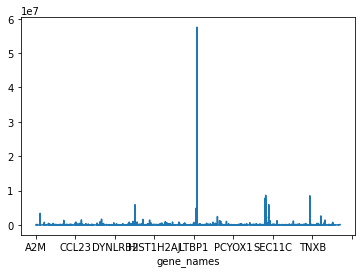

In [196]:
X_df.sum().plot()

Test with some classifiers to check training & testing works across the two datasets.

In [197]:
rfc=RandomForestClassifier(n_estimators=100, criterion="gini",min_samples_split=2)

#Train the model using the training sets and make prediction
rfc.fit(X_train,y_train)
    
y_pred=rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_scroe:",metrics.f1_score(y_test, y_pred, average='micro'))
print("f1_scroe:",metrics.f1_score(y_test, y_pred, average='macro'))

/home/seoyeono/.conda/envs/dp2122/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.5211666666666667
f1_scroe: 0.5211666666666667
f1_scroe: 0.48912248194930386


In [198]:
LR = LogisticRegression(multi_class="multinomial").fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_scroe:",metrics.f1_score(y_test, y_pred, average='micro'))
print("f1_scroe:",metrics.f1_score(y_test, y_pred, average='macro'))

/home/seoyeono/.conda/envs/dp2122/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/seoyeono/.conda/envs/dp2122/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.5855
f1_scroe: 0.5855
f1_scroe: 0.5656804300854394


In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_scroe:",metrics.f1_score(y_test, y_pred, average='micro'))
print("f1_scroe:",metrics.f1_score(y_test, y_pred, average='macro'))